In [1]:
#!/usr/bin/env python

import matplotlib
matplotlib.use('PDF')
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages


# Switch to Type 1 Fonts. 
matplotlib.rcParams['ps.useafm'] = True
matplotlib.rcParams['pdf.use14corefonts'] = True
matplotlib.rcParams['text.usetex'] = True

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
from matplotlib.lines import Line2D
from matplotlib import cm, rc
from sklearn.linear_model import LinearRegression
%matplotlib inline

rc("text", usetex=True)
plt.rcParams.update({"font.size": 16})

In [2]:
def fit_a_line(xs: pd.Series, ys: pd.Series, exclude_4th_point=False):
    # Linear Regression
    if exclude_4th_point:
        rxs = list(xs.to_numpy())
        rxs = rxs[:4] + rxs[5:]
        rxs = np.array(rxs)[:, np.newaxis]
        rys = list(ys.to_numpy())
        rys = rys[:4] + rys[5:]
        rys = np.array(rys)
    else:
        rxs = xs.to_numpy()[:, np.newaxis]
        rys = ys.to_numpy()

    reg = LinearRegression().fit(rxs, rys)
    r2 = reg.score(rxs, rys)

    rxs = np.linspace(min(xs), max(xs))
    rys = rxs * reg.coef_[0] + reg.intercept_

    return rxs, rys, r2

In [3]:
markers = {
    "Baseline": "o",
    "One-Branch": ".",
    "RAdam": "v",
    "LookAhead": ">",
    "Prog.Resize": "^",
    "RandomGrad.": "<",
    "CyclicLR": "8",
    "PolyLR1/2Epochs": "s",
    "LabelRelaxation": "p",
    "DiceLoss": "x",
    "FocalLoss": "+",
    "Mixup": "H",
    "BlurPool": "D",
    "SwitchNorm": "d",
    "Sp.Bottleneck": "h",
    "Sp.Bottleneck$^{\\dagger}$": "h",
    r"GE-$\theta$": "P",
    r"GE-$\theta^{-}$": "X",
    "CoordConv": "*",
}

# for k,v in markers.items():
#     markers[k] = 'o'

print(markers)

# cmap = plt.get_cmap("tab20b")
# cmap = plt.get_cmap("jet")
cmap = plt.get_cmap("nipy_spectral")
colors = {}
for i, (k, v) in enumerate(markers.items()):
    colors[k] = tuple([0.7 * x for x in cmap(i / 18)[:3]] + [1.0])

{'Baseline': 'o', 'One-Branch': '.', 'RAdam': 'v', 'LookAhead': '>', 'Prog.Resize': '^', 'RandomGrad.': '<', 'CyclicLR': '8', 'PolyLR1/2Epochs': 's', 'LabelRelaxation': 'p', 'DiceLoss': 'x', 'FocalLoss': '+', 'Mixup': 'H', 'BlurPool': 'D', 'SwitchNorm': 'd', 'Sp.Bottleneck': 'h', 'Sp.Bottleneck$^{\\dagger}$': 'h', 'GE-$\\theta$': 'P', 'GE-$\\theta^{-}$': 'X', 'CoordConv': '*'}


In [4]:
def create_graph(
    xs: pd.Series,
    ys: pd.Series,
    title: str,
    text=False,
    exclude_sp_bottleneck=False,
    plot=False,
    legend_below=False,
    fit=False,
    fill=None,
    drop=False,
):
    swap = len(xs.index) < len(ys.index)
    if swap:
        df = pd.DataFrame([ys, xs])
    else:
        df = pd.DataFrame([xs, ys])
    df = df.transpose()
    if fill:
        df = df.fillna(fill)
    if drop:
        df = df.dropna()
    if swap:            
        xs = df[df.columns[1]]
        ys = df[df.columns[0]]
    else:
        xs = df[df.columns[0]]
        ys = df[df.columns[1]]

    names = list(xs.index)

    if len(xs) == 18:
        ncol = 5
        height = 6
    else:
        ncol = 4
        height = 4

    fig, ax = plt.subplots(figsize=(12, height))

    for index, (x, y) in enumerate(zip(xs, ys)):
        # clr = (0.7, 0, 0, 0.7) if right else (0, 0.7, 0, 0.7)
        ms = 80
        _ = ax.scatter(
            x,
            y,
            marker=markers[names[index]],
            label=names[index],
            s=ms * 3,
            c=[colors[names[index]]],
            edgecolor="black",
            linewidths=0.7,
            alpha=0.7,
        )

        if text:
            _ = ax.text(
                xs[index], ys[index], "  " + names[index], color=clr, fontsize=14
            )
        else:
            _ = plt.legend(
                bbox_to_anchor=(1.05, 1),
                loc="upper left",
                borderaxespad=0.0,
                prop={"size": 13},
            )

    if fit:
        rxs, rys, r2 = fit_a_line(xs, ys, exclude_sp_bottleneck)
        _ = plt.plot(rxs, rys, "r--")
        _ = plt.text(0.8, 0.7, f"$r^2$ = {r2:.2f}", color="red", transform=ax.transAxes)

    # ax.set_title(title)
    _ = plt.ylabel(ys.name)  # , color="g")
    _ = plt.xlabel(xs.name)
    # ax.spines["right"].set_visible(False)
    # ax.spines["top"].set_visible(False)
    _ = plt.grid(color=(0.8, 0.8, 0.8, 0.3), linestyle="-", linewidth=0.5)
    _ = ax.set_axisbelow(True)

    plt.tight_layout()
    # plt.show()
    plt.savefig("plot_" + title.lower().replace(" ", "_").replace("#", "") + ".pdf")

In [5]:
def create_graph2(
    xs: pd.Series,
    ys: pd.Series,
    ys2: pd.Series,
    title: str,
    text=False,
    exclude_sp_bottleneck=False,
    plot=False,
    legend_below=False,
    old_ax=None,
    fit=False,
):
    names = list(xs.index)

    if len(xs) == 18:
        ncol = 5
        height = 6
    else:
        ncol = 4
        height = 4

    fig, ax = plt.subplots(figsize=(12, height))
    cmap = plt.get_cmap("tab20")

    for index, (x, y) in enumerate(zip(xs, ys)):
        clr = tuple([0.7 * x for x in cmap(index / xs.size)[:3]] + [1.0])
        clr = (0, 0.7, 0, 0.7)
        ms = 80
        _ = ax.scatter(
            x,
            y,
            marker=markers[names[index]],
            label=names[index],
            s=ms * 3,
            c=[clr],
            edgecolor="black",
            linewidths=0.7,
            alpha=0.7,
        )

        if text:
            _ = ax.text(xs[index], ys[index], "  " + names[index], color=clr, fontsize=14)
        else:
            if legend_below:
                _ = plt.legend(
                    bbox_to_anchor=(0.5, -0.15),
                    loc="upper center",
                    borderaxespad=0.0,
                    ncol=ncol,
                )
            else:
                _ = plt.legend(
                    bbox_to_anchor=(1.08, 1),
                    loc="upper left",
                    borderaxespad=0.0,
                    prop={"size": 13},
                )
    if fit:
        rxs, rys, r2 = fit_a_line(xs, ys, exclude_sp_bottleneck)
        ax.plot(rxs, rys, "g--")
        ax.text(0.8, 0.7, f"$r^2$ = {r2:.2f}", color="green", transform=ax.transAxes)

    # ax.set_title(title)

    plt.ylabel(ys.name, color="g")
    plt.xlabel(xs.name)
    #     ax.spines["right"].set_visible(False)
    #     ax.spines["top"].set_visible(False)
    plt.grid(color=(0.8, 0.8, 0.8, 0.3), linestyle="-", linewidth=0.5)
    ax.set_axisbelow(True)

    #####################################################################
    ax2 = ax.twinx()

    for index, (x, y) in enumerate(zip(xs, ys2)):
        clr = (0.7, 0, 0, 0.7)
        ms = 80
        ax2.scatter(
            x,
            y,
            marker=markers[names[index]],
            label=names[index],
            s=ms * 3,
            c=[clr],
            edgecolor="black",
            linewidths=0.7,
            alpha=0.7,
        )
        if text:
            ax2.text(xs[index], ys2[index], "  " + names[index], color=clr, fontsize=14)

    if fit:
        rxs, rys, r2 = fit_a_line(xs, ys2, exclude_sp_bottleneck)
        ax2.plot(rxs, rys, "r--")
        ax2.text(0.8, 0.7, f"$r^2$ = {r2:.2f}", color="red", transform=ax2.transAxes)

    plt.ylabel(ys2.name, color="r")

    plt.tight_layout()
    # plt.show()
    plt.savefig("plot_" + title.lower().replace(" ", "_").replace("#", "") + ".pdf")

In [6]:
tables = r"""
\begin{table*}[t]
    \caption{Effect of different techniques on mIoU calculated for both training and validation sets, and total GPU energy used for training per run for Segmentation(Cityscapes $512\times1024$) and Classification(CIFAR-100)}
    \begin{center}
    \begin{tabular}{|l|l|ccc|ccc|}
        \hline
         & LR & \multicolumn{3}{c|}{Segmentation} & \multicolumn{3}{c|}{Classification} \\
        \cline{3-8}
        Method & Scheduler & mIoU   & mIoU   & Energy &  Train &   Test & Energy \\
               & (seg/cls) & train. & valid. & train. & Accuracy & Accuracy & train. \\
        \hline\hline
        Baseline & poly/step & 84.4\% & 69.3\% & 19.6 MJ & 99.96\% & 78.65\% & 2.67 MJ\\
        \hline
        One-Branch & poly/step & 83.5\% & 68.6\% & \bf 17.1 MJ & - & - & -\\
        \hline
        Random Grad. & poly/step & \bf 85.1\% & \bf 69.7\% & 19.7 MJ & 99.93\% & 78.07\% & \bf 2.43 MJ\\
        Cyclic LR & cyclic/cyclic & 80.5\% & 67.6\% & \bf 19.5 MJ & 99.92\% & 74.08\% & \bf 2.35 MJ\\
        Poly LR 1/2 Epochs & poly/poly & 82.3\% & \bf 69.3\% & \bf 9.8 MJ & 99.89\% & 77.26\% & \bf 1.36 MJ\\
        \hline
        Prog. Resize & poly/step & 80.3\% & 64.5\% & \bf 8.0 MJ & - & - & -\\
        Mixup & poly/step & 41.8\% & 68.1\% & 20.3 MJ & 99.35\% & \bf 80.65\% & \bf 2.62 MJ\\
        \hline
        RAdam & poly/step & 82.5\% & 67.8\% & 20.1 MJ & 99.50\% & 73.65\% & 4.31 MJ\\
        LookAhead & poly/step & \bf 84.9\% & 68.8\% & \bf 19.5 MJ & \bf 99.97\% & \bf 79.10\% & \bf 2.45 MJ\\
        \hline
        Label Relaxation & poly/step & 81.6\% & 67.4\% & 33.7 MJ & - & - & -\\
        Dice Loss & poly/step & \bf 85.6\% & 68.5\% & 25.7 MJ & - & - & -\\
        Focal Loss & poly/step & 83.5\% & 68.5\% & 20.8 MJ & 99.60\% & \bf 78.16\% & \bf 2.41 MJ\\
        \hline
        BlurPool & poly/step & \bf 84.6\% & 67.3\% & 26.2 MJ & 99.93\% & \bf 79.44\% & 3.18 MJ\\
        SwitchNorm & poly/step & 84.3\% & 68.7\% & 19.7 MJ & 99.50\% & 77.12\% & 4.63 MJ\\
        Sp. Bottleneck & poly/step & 79.8\% & 66.0\% & 20.8 MJ & 99.93\% & 72.76\% & 4.25 MJ\\
        GE-$\theta$ & poly/step & 84.3\% & 68.7\% & \bf 19.6 MJ & 99.94\% & \bf 78.98\% & 3.37 MJ\\
        GE-$\theta^{-}$ & poly/step & 84.4\% & 68.3\% & \bf 18.8 MJ & 99.93\% & 78.57\% & 2.70 MJ\\
        CoordConv & poly/step & 83.1\% & 69.0\% & 24.3 MJ & 99.95\% & \bf 78.82\% & 2.79 MJ\\
        \hline
    \end{tabular}
    \end{center}
    \label{tab:train_table}
\end{table*}

\begin{table*}[t]
    \caption{Per image inference metrics for Segmentation (Cityscapes $512\times1024$) and Classification (CIFAR-100).}
    \small
    \begin{center}
        \begin{tabular}{|l|cccc|cccc|}
        \hline
         &  \multicolumn{4}{c|}{Segmentation} &  \multicolumn{4}{c|}{Classification} \\
        \cline{2-9}
        Method & Params & FLOPs & Time & Energy & Params & FLOPs & Time & Energy\\
        \hline\hline
        Baseline & 14.01 M & 25.93 G & 6.51 ms & 1.57 J & 2.37 M & 1.3 G & \bf 6.6 ms & 0.98 J \\
        \hline
        One-Branch & \bf 13.88 M & \bf 22.85 G & \bf 5.07 ms & \bf 1.26 J & - & - & - & -\\
        \hline
        BlurPool & \bf 14.01 M & 34.16 G & 11.7 ms & 2.892 J & \bf 2.37 M & 1.93 G & 6.7 ms & 1.0 J\\
        SwitchNorm & \bf 14.01 M & 25.93 G & 7.25 ms & 1.589 J & \bf 2.37 M & \bf 1.3 G & 23.1 ms & 2.4 J\\
        Sp. Bottleneck & \bf 14.01 M & \bf 15.36 G & \bf 6.51 ms & 1.608 J & \bf 2.37 M & \bf 0.86 G & 7.32 ms & 1.1 J\\
        GE-$\theta$ & 21.88 M & \bf 25.93 G & 6.73 ms & 1.635 J & 2.42 M & \bf 1.3 G & 6.97 ms & 1.0 J\\
        GE-$\theta^{-}$ & \bf 14.01 M & \bf 25.93 G & 6.71 ms & 1.711 J & \bf 2.37 M & \bf 1.3 G & 6.96 ms & 1.0 J\\
        CoordConv & 14.02 M & 27.16 G & 8.10 ms & 2.009 J & 2.42 M & \bf 1.3 G & 6.66 ms & \bf 0.97 J\\
        \hline
        \end{tabular}
    \end{center}
    \label{tab:infer_table}
\end{table*}"""

In [7]:
tables = tables.replace('${\x0crac{1}{2}}$', '1/2').replace('\\bf ','').replace('\\% ','').replace('MJ','').replace('\\\\\n','\n')
table1, table2 = tables.split('\n\n')

In [8]:
def str_to_df(table1, poplist=None):
    table1 = [line.strip() for line in table1.split('\n') if ('&' in line)]
    if poplist is not None:
        for i in poplist:
            table1.pop(i)
    from io import StringIO
    TABLE = StringIO("\n".join(table1).replace(' ',''))
    return pd.read_csv(TABLE, sep="&", index_col=0)

In [9]:
def series_from_df(df, column_name, new_column_name):
    def tofloat(s):
        if isinstance(s,str):
            if s == '-':
                return np.nan
            else:
                return float(s.strip("msGJM%"))
        else:
            return s
    s = pd.Series(
        data=[tofloat(val) for val in df[column_name].values],
        index=df[column_name].index,
        name=new_column_name,
    )
    return s

In [10]:
df = str_to_df(table1, [0,1])
seg_tmiou = series_from_df(df, "mIoU", "Training mIoU [\%]")
seg_vmiou = series_from_df(df, "mIoU.1", "Validation mIoU [\%]")
seg_tenergy = series_from_df(df, "Energy", "Training Energy [MJ]")

cls_tacc = series_from_df(df, "Train", "Training Accuracy [\%]")
cls_vacc = series_from_df(df, "Test", "Validation Accuracy [\%]")
cls_tenergy = series_from_df(df, "Energy.1", "Training Energy [MJ]")


display(
    pd.DataFrame(
        [seg_tmiou, seg_vmiou, seg_tenergy, cls_tacc, cls_vacc, cls_tenergy]
    ).transpose()
)

,Training mIoU [\%],Validation mIoU [\%],Training Energy [MJ],Training Accuracy [\%],Validation Accuracy [\%],Training Energy [MJ]
Method,,,,,,
Baseline,84.4,69.3,19.6,99.96,78.65,2.67
One-Branch,83.5,68.6,17.1,NaN,NaN,NaN
RandomGrad.,85.1,69.7,19.7,99.93,78.07,2.43
CyclicLR,80.5,67.6,19.5,99.92,74.08,2.35
PolyLR1/2Epochs,82.3,69.3,9.8,99.89,77.26,1.36
Prog.Resize,80.3,64.5,8.0,NaN,NaN,NaN
Mixup,41.8,68.1,20.3,99.35,80.65,2.62
RAdam,82.5,67.8,20.1,99.50,73.65,4.31
LookAhead,84.9,68.8,19.5,99.97,79.10,2.45


In [11]:
df = str_to_df(table2, [0])
seg_params = series_from_df(df, "Params", "\#Parameters [M]")
seg_iflops = series_from_df(df, "FLOPs", "\#FLOPs [G]")
seg_itime = series_from_df(df, "Time", "Inference Time [ms]")
seg_ienergy = series_from_df(df, "Energy", "Inference Energy [J]")

cls_params = series_from_df(df, "Params.1", "\#Parameters [M]")
cls_iflops = series_from_df(df, "FLOPs.1", "\#FLOPs [G]")
cls_itime = series_from_df(df, "Time.1", "Inference Time [ms]")
cls_ienergy = series_from_df(df, "Energy.1", "Inferemce Energy [J]")

display(
    pd.DataFrame(
        [
            seg_params,
            seg_iflops,
            seg_itime,
            seg_ienergy,
            cls_params,
            cls_iflops,
            cls_itime,
            cls_ienergy,
        ]
    ).transpose()
)

,\#Parameters [M],\#FLOPs [G],Inference Time [ms],Inference Energy [J],\#Parameters [M],\#FLOPs [G],Inference Time [ms],Inferemce Energy [J]
Method,,,,,,,,
Baseline,14.01,25.93,6.51,1.570,2.37,1.30,6.60,0.98
One-Branch,13.88,22.85,5.07,1.260,NaN,NaN,NaN,NaN
BlurPool,14.01,34.16,11.70,2.892,2.37,1.93,6.70,1.00
SwitchNorm,14.01,25.93,7.25,1.589,2.37,1.30,23.10,2.40
Sp.Bottleneck,14.01,15.36,6.51,1.608,2.37,0.86,7.32,1.10
GE-$\theta$,21.88,25.93,6.73,1.635,2.42,1.30,6.97,1.00
GE-$\theta^{-}$,14.01,25.93,6.71,1.711,2.37,1.30,6.96,1.00
CoordConv,14.02,27.16,8.10,2.009,2.42,1.30,6.66,0.97


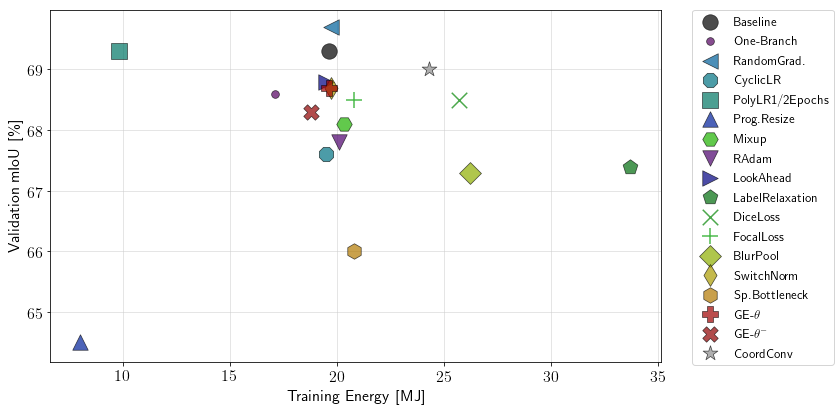

In [12]:
plt.rcParams.update({"font.size": 16})
create_graph(seg_tenergy, seg_vmiou, "Validation mIoU vs Training Energy",fit=False);

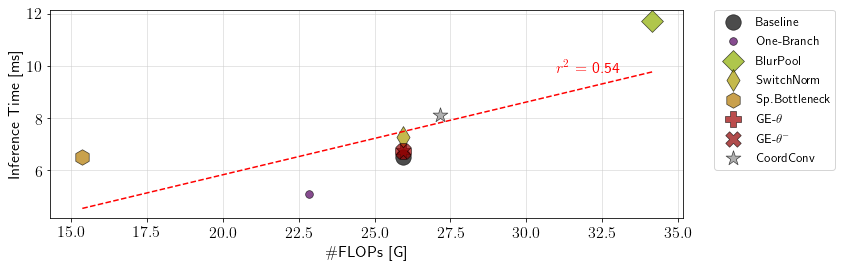

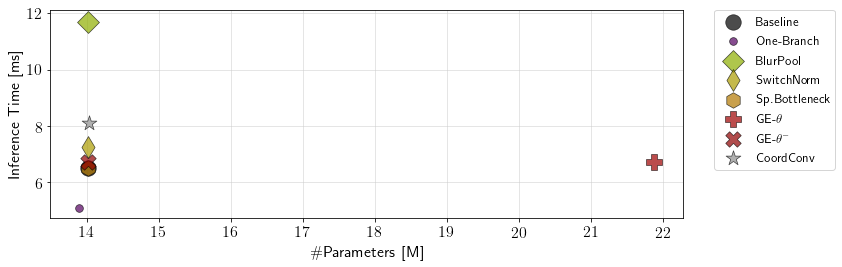

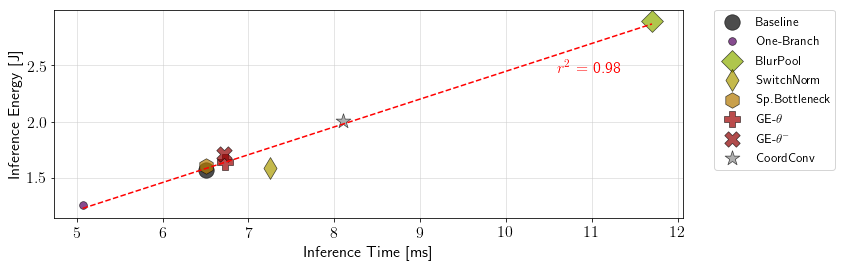

In [13]:
create_graph(seg_iflops, seg_itime, "Inference Time vs FLOPs", fit=True)
create_graph(seg_params, seg_itime, "Inference Time vs Parameters")
create_graph(seg_itime, seg_ienergy, "Inference Energy vs Inference Time", fit=True)

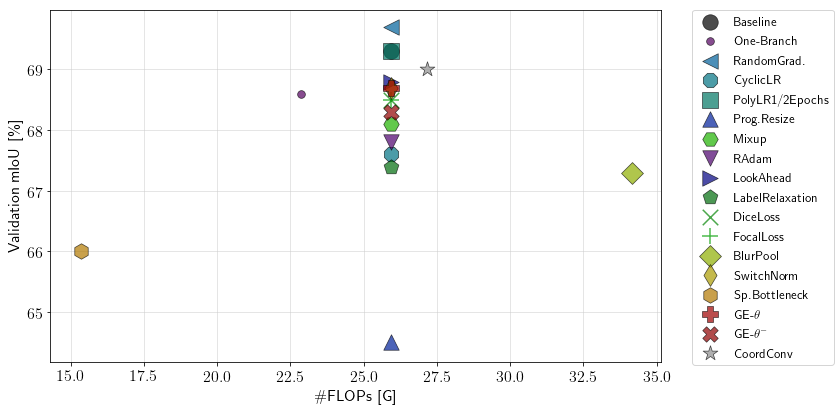

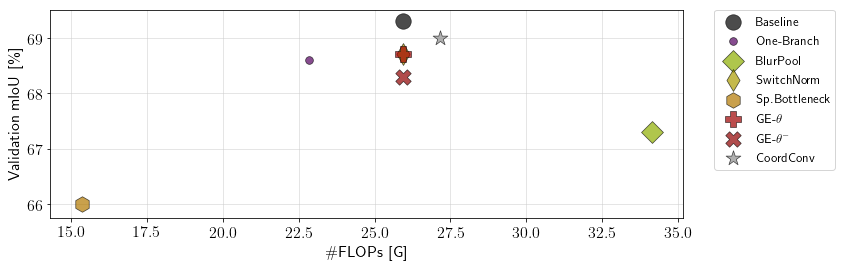

In [14]:
# create_graph(seg_params, seg_vmiou, "Validation mIoU vs FLOPs fill", fill=seg_params['Baseline'])
create_graph(seg_iflops, seg_vmiou, "Validation mIoU vs FLOPs fill", fill=seg_iflops['Baseline'])
create_graph(seg_iflops, seg_vmiou, "Validation mIoU vs FLOPs drop", drop=True)

# create_graph(seg_params, seg_vmiou, "Inference Time vs Parameters", fit=True)
# create_graph(seg_iflops, seg_itime, "Inference Time vs FLOPs", text=False,fit=True)
# create_graph(seg_iflops, seg_ienergy, "Inference Energy vs FLOPs",text=False,fit=True)
# create_graph(seg_itime, seg_ienergy, "Inference Energy vs Inference Time", fit=True)

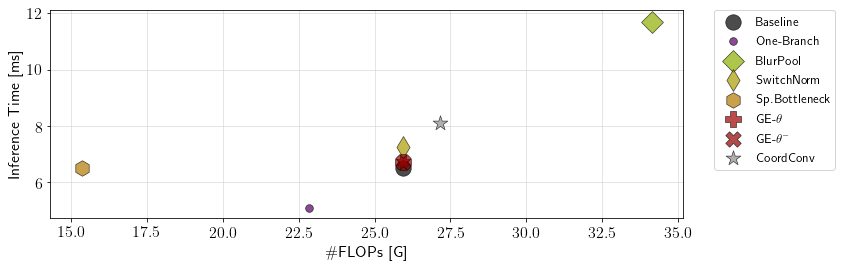

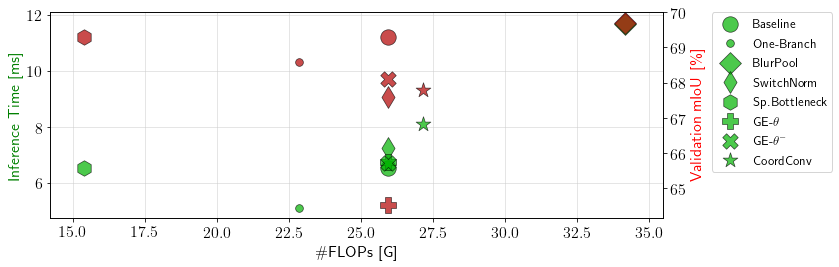

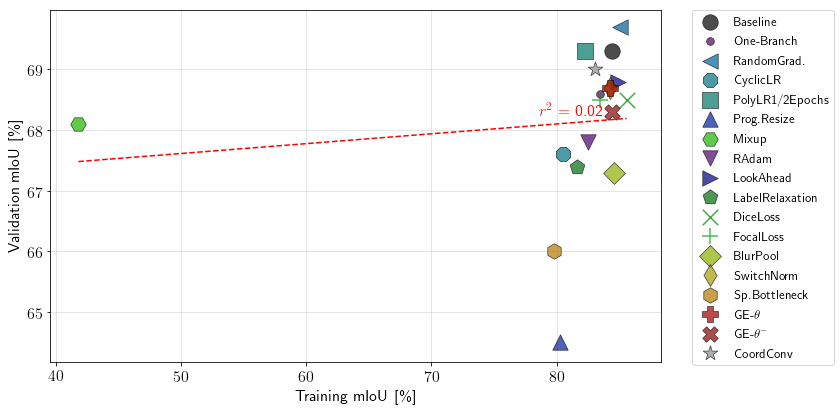

In [15]:
create_graph(seg_iflops, seg_itime, "Inference Time vs FLOPs", fit=False)
#create_graph2(seg_iflops, seg_itime, seg_ienergy, "Inference Time and Inference Energy vs FLOPs", text=False, fit=False);
create_graph2(seg_iflops, seg_itime, seg_vmiou, "Inference Time and Validation mIoU vs FLOPs")
#create_graph2(seg_params, seg_itime, seg_vmiou, "Inference Time and Validation mIoU vs FLOPs")

create_graph(seg_tmiou, seg_vmiou, "Validation mIoU vs Training mIoU", fit=True)

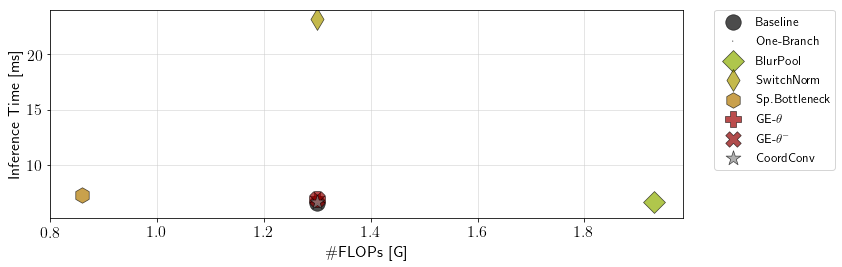

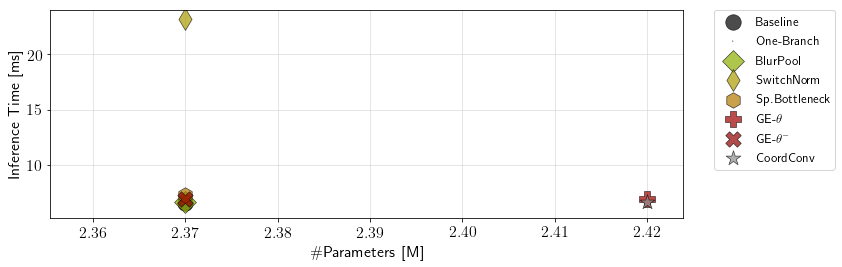

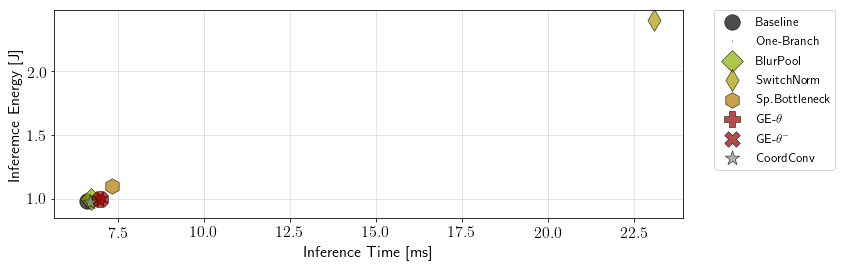

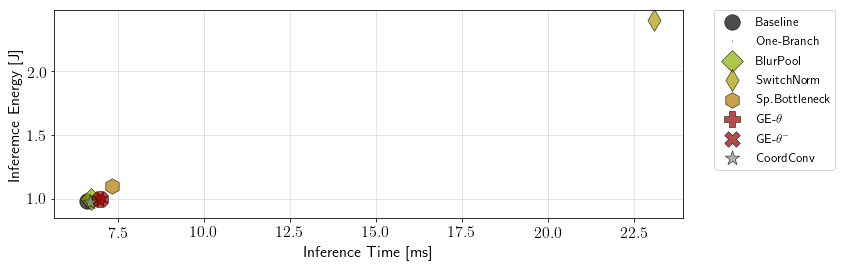

In [16]:
create_graph(cls_iflops, cls_itime, "cls Inference Time vs Operations")
create_graph(cls_params, cls_itime, "cls Inference Time vs Parameters")
create_graph(cls_itime, cls_ienergy, "cls Inference Time vs Inference Energy")
create_graph(cls_itime, cls_ienergy, "cls Inference Time vs Inference Energy")

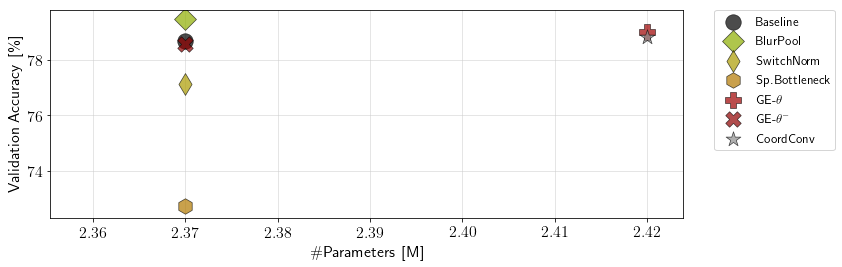

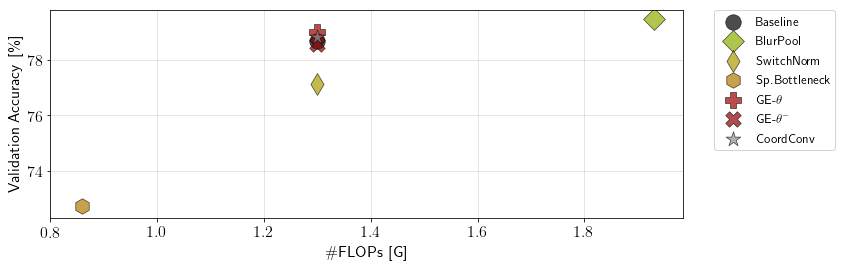

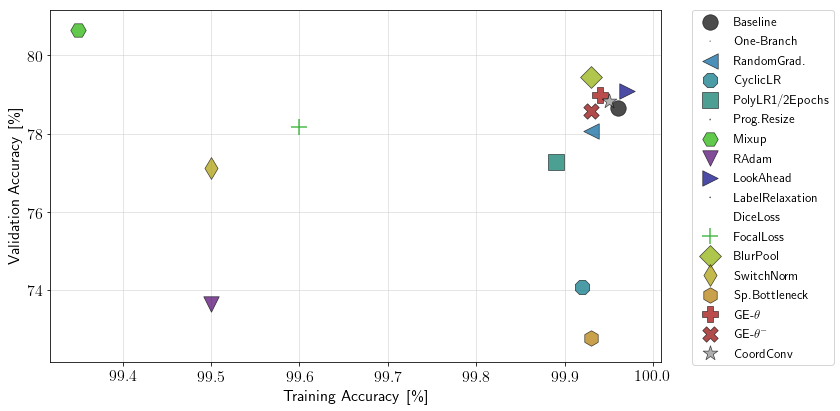

In [17]:
create_graph(cls_params, cls_vacc, "cls Validation Accuracy vs Parameters", drop=True)#fill=seg_iflops['Baseline'])
create_graph(cls_iflops, cls_vacc, "cls Validation Accuracy vs FLOPs", drop=True)#fill=seg_iflops['Baseline'])
create_graph(cls_tacc, cls_vacc, "cls Validation Accuracy vs Training Accuracy")

#create_graph(seg_iflops, seg_itime, "Inference Time vs FLOPs", fit=False)
#create_graph2(seg_iflops, seg_itime, seg_ienergy, "Inference Time and Inference Energy vs FLOPs", text=False, fit=False);
#create_graph2(seg_iflops, seg_itime, seg_vmiou, "Inference Time and Validation mIoU vs FLOPs")
#create_graph2(seg_params, seg_itime, seg_vmiou, "Inference Time and Validation mIoU vs FLOPs")